In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all" # cell 的多行输出

# 逻辑回归的数学原理

逻辑回归是分类模型

逻辑回归是将sigmoid函数作用于线性回归的输出，本质输出0-1之间的概率

线性回归公式：$y=k0+k1*x^1+k1*x^1+k2*x^2+...+kn*x^n$

sigmoid：$y=\frac{1}{(1-e^{-y})}$

逻辑回归：$y=\frac{1}{(1-e^{-k0+k1*x^1+k1*x^1+k2*x^2+...+kn*x^n})}$

在实际模型搭建中，就是要找到合适的系数ki和截距项k0

在数学中使用极大似然估计法来确定合适的系数ki和截距项k0，从而得到相应的概率

# 绘制 sigmoid

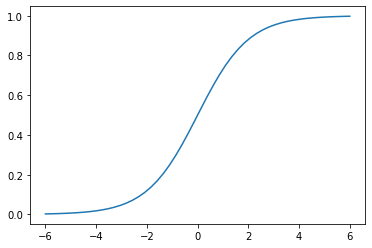

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-6,6)
y=1.0/(1.0+np.exp(-x))

plt.plot(x,y)
plt.show();

# 超简单示例

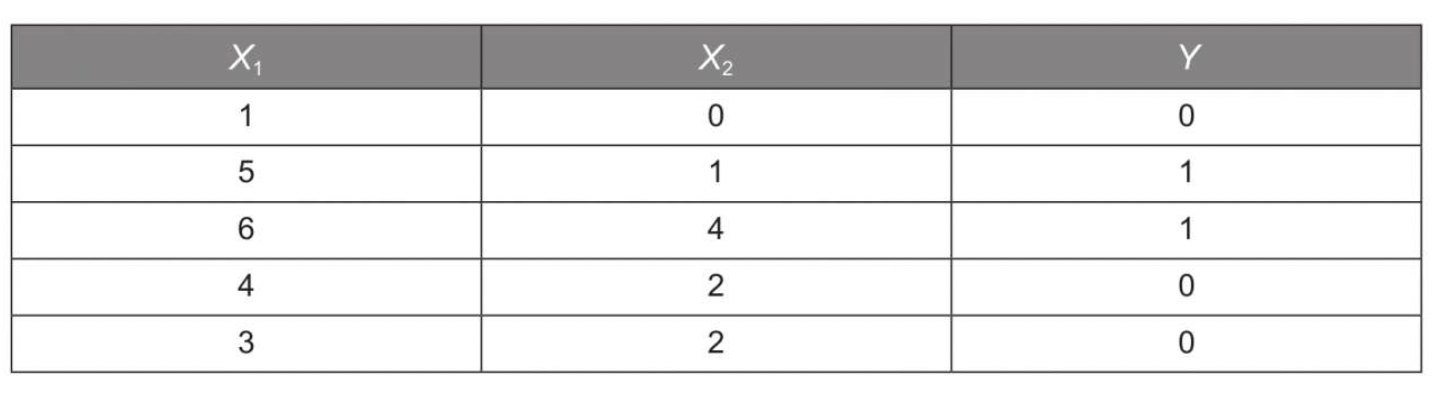

In [4]:
X = [[1, 0], [5, 1], [6, 4], [4, 2], [3, 2]]
y = [0, 1, 1, 0, 0]

In [5]:
from sklearn.linear_model import LogisticRegression
logis=LogisticRegression()
logis.fit(X,y)
logis.predict([[2,2]])
logis.predict([[2,2],[3,3]])

LogisticRegression()

array([0])

array([0, 0])

predict() 默认接受多维数组，使用二维数组，是为了统一 预测单个、多个的代码

In [6]:
# 获取 回归模型 预测的概率
y_pred_proba=logis.predict_proba(X)
import pandas as pd
pd.DataFrame(y_pred_proba,columns=['分类为0的概率','分类为1的概率'])

,分类为0的概率,分类为1的概率
0,0.973449,0.026551
1,0.390720,0.609280
2,0.179910,0.820090
3,0.631679,0.368321
4,0.824245,0.175755


In [17]:
# 模型表达式
logis.intercept_#k0
logis.coef_#ki
print(r"y=1/(1-e^({}+{}*x^2+{}*x))".format(logis.intercept_[0],logis.coef_[0][0],logis.coef_[0][1]))

array([-4.60771284])

array([[1.00595248, 0.02223835]])

y=1/(1-e^(-4.607712844062641+1.0059524797532882*x^2+0.02223835108608966*x))


也可用逻辑回归模型处理多分类问题

In [19]:
# 构造数据，此时y有3个分类-1、0、1
X = [[1, 0], [5, 1], [6, 4], [4, 2], [3, 2]]
y = [-1, 0, 1, 1, 1]
# 模型训练
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [24]:
model.predict([[0,0]])
y_pred_proba=model.predict_proba([[0,0]])
pd.DataFrame(y_pred_proba,columns=['分类为-1的概率','分类为0的概率','分类为1的概率'])

array([-1])

,分类为-1的概率,分类为0的概率,分类为1的概率
0,0.883523,0.0234,0.093077


# 客户流失预警模型

## 案例背景

在进行每一笔股票交易时，交易者（股民）都要给其账户所在的证券公司支付一些手续费，虽然单笔交易的手续费不高，但是股票市场每日都有巨额的成交量，每一笔交易的手续费汇总起来，数量便相当可观。这部分收入对于一些证券公司来说很重要，甚至可以占到营业总收入的50%以上，因此，证券公司对于客户（即交易者）的忠诚度和活跃度是很看重的。

因此，证券公司会搭建一套客户流失预警模型来预测客户是否会流失，并对流失概率较大的客户采取相应的挽回措施，因为通常情况下，获得新客户的成本比保留现有客户的成本要高得多。

## 代码

In [25]:
import pandas as pd
df=pd.read_excel('./data/股票客户流失.xlsx')
df.head()

,账户资金（元）,最后一次交易距今时间（天）,上月交易佣金（元）,累计交易佣金（元）,本券商使用时长（年）,是否流失
0,22686.5,297,149.25,2029.85,0,0
1,190055.0,42,284.75,3889.50,2,0
2,29733.5,233,269.25,2108.15,0,1
3,185667.5,44,211.50,3840.75,3,0
4,33648.5,213,353.50,2151.65,0,1


股票客户流失表中共有约7000组历史数据，其中约2000组为流失客户，约5000组为未流失客户。账户资金即客户通过证券公司用于炒股的金额，交易佣金即手续费，券商即证券公司。因为Python数学建模中无法识别文本内容，所以“是否流失”栏中的内容已做了数值转换处理：0表示未流失，1表示流失

In [26]:
X=df.drop(columns='是否流失')
y=df['是否流失']

In [27]:
# 切分 训练集、测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) # test_size测试集的比例

train_test_split()函数都会随机划分数据，如果想要让每次划分数据的结果保持一致，可以设置random_state参数

random_state参数的值没有特殊含义，可以换成其他数字，它相当于一个种子参数，使得每次划分数据的结果一致

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
```

In [29]:
#模型训练
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()#使用默认参数
model.fit(X_train,y_train)#使用训练集训练

LogisticRegression()

模型使用1：预测结果

In [30]:
y_pred=model.predict(X_test)

查看模型的准确性，有两种方法如下

In [32]:
# sklearn.metrics 下的 accuracy_score()
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.7920511000709723

In [34]:
# 逻辑回归模型 obj 自带的 score()
model.score(X_test,y_test)

0.7920511000709723

模型使用2：预测概率

In [36]:
y_pred_proba=model.predict_proba(X_test)
y_pred_proba[:5]

array([[0.5374336 , 0.4625664 ],
       [0.59686249, 0.40313751],
       [0.90046009, 0.09953991],
       [0.20016667, 0.79983333],
       [0.97517454, 0.02482546]])